In [88]:
import matplotlib.pyplot as plt
import pandas as pd
from icecream import ic
import os
import numpy as np

In [89]:
ABS_PATH = os.path.abspath("")
DOWNLOAD_PATH = os.path.join(ABS_PATH, "downloads")
os.makedirs(DOWNLOAD_PATH, exist_ok=True)

In [152]:
def process_lines(lines):

    data = dict(zip(["date", "likes", "artist", "shared_by", "hashtags"], [np.nan]*5))

    for line in lines[:-1]:
        line = line.replace("\n", "")
        try:
            if line.startswith("D"):
                data["date"] = line.split(":")[1][1:]
            elif line.startswith("L"):
                data["likes"] = int(line.split(":")[1].split(" ")[1])
            elif line.startswith("C"):
                data["artist"] = line.split("@")[1]
            elif line.startswith("Shared"):
                data["shared_by"] = line.split("@")[1]

        except Exception as e:
            pass

    hashtags = lines[-1].replace(" ", "").split("#")
    data["hashtags"] = hashtags
    
    return list(data.values())

In [153]:
lis = []

for dir_name in os.listdir(DOWNLOAD_PATH):    
    path = os.path.join(DOWNLOAD_PATH, dir_name, "scraped_data.txt")
    
    with open(path, "r") as f:
        lines = f.readlines()
    
    data = process_lines(lines)

    data.insert(0, dir_name)
    lis.append(data)


df = pd.DataFrame(lis, columns=["post_id", "date", "likes", "artist", "shared_by", "hashtags"])

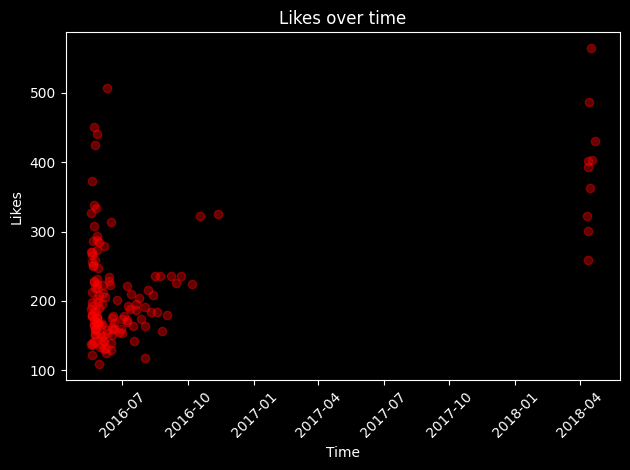

In [154]:
from datetime import datetime
#from seaborn import color_palette

time_points = df["date"]
values = df["likes"]
# Convert time points to datetime objects
time_points = [datetime.strptime(date, "%d %B %Y") for date in time_points]
# Convert time points to datetime objects

# Plotting
plt.style.use("dark_background")
plt.scatter(time_points, values, marker='o', color="r", alpha=0.4)
plt.title('Likes over time')
plt.xlabel('Time')
plt.ylabel('Likes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()